# Guide
- 동기적 실행, 비동기적 실행을 함수의 호출관계로 생각하지 말고 **함수의 명령문들이 작성된 순서대로 실행되는 것으로 생각하자**
```python
def 배달():
    1. 짜장면을 배달한다.
    2. 먹기를 기다린다.
    3. 그릇을 받아 돌아온다.    
```
    - 이것이 순서대로 실행되면 동기적 실행
    - 비동기는 먹기를 기다리지 않고 돌아와서 다른 배달을 하는 것. 이것을 비동기적 실행이라고 한다.

- **예제는 .py로 실행한다.** 
    - jupyter notebook 에서 실행하지 않는다.
- Generator도 Co-routine의 한 종류
- **[이벤트 루프](#이벤트-루프-(Event-Loop))**
    - 코루틴은 응답이 지연되는 부분에서 이벤트 루프에 통제권을 줄 수 있으며, 응답이 완료되었을 때 멈추었던 부분부터 기존의 상태를 유지한 채 남은 작업을 완료할 수 있는 함수
    - https://sjquant.tistory.com/15 
    
- [주피터노트북 asyncio 실행 Runtime Error](#asyncio와-주피터노트북에서-에러)   
    - - http://blog.naver.com/PostView.nhn?blogId=jinju2415&logNo=221546342937&categoryNo=45&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView
    
    
- 예전스타일
```python
import asyncio
import time
```

```python
# 코루틴 구현 (네이티브 코루틴 - def 앞에 async 붙인다.)
async def sleep():
    await asyncio.sleep(5)  #sleep(5초): 대기를 타게 되므로 await를 선언해 통제권을 event loop로 반환한다.
   
start = time.time()
```
```python
# 이벤트 루프 정의
loop = asyncio.get_event_loop() 
# 이벤트 루프 실행
loop.run_until_complete(sleep()) # sleep() 호출->코루틴 호출
end = time.time()
print(str(end-start)+'s')
```

# 동기(Synchronous), 비동기(asynchronous) 프로그래밍이란
<img src="https://i.imgur.com/hh3Mawr.png" width="640">
<center><이미지출처> https://learnjs.vlpt.us/async/</center>

- **동기적 처리**
    - 요청을 하면 응답이 올 때 까지 기다린다.
    - 하나의 작업이 끝나야 다른 작업을 실행할 수 있다.
    - cpu 작업과 io 작업을 번갈아 가면서 할 경우 자원이 효율적으로 사용되지 않는다.
   
- **비동기적 처리**
    - 요청을 한 뒤 응답을 기다리지 않고 다음 작업을 실행한다.
    - 하나의 작업이 끝나지 않아도 다른 작업이 실행 될 수 있다. 
    - 동시에 여러 작업을 실행할 수 있다.

# 코루틴(co-routine)을 이용한 비동기 프로그래밍

## 메인루틴과 서브루틴
- **루틴이란**
    - 코드의 실행흐름을 말한다.
- **메인 루틴**
    - 프로그램의 메인 흐름을 말한다. 동기적으로 처리된 프로그램의 경우 메인루틴이 종료되면 프로그램이 종료된다.
- **서브루틴**
    - 메인루틴의 보조역할을 한다.
    - 하나의 진입점과 하나의 탈출점을 가진다.
        - 보통 메인루틴에서 호출한 함수나 메소드를 말한다.
- 메인루틴과 서브루틴의 동기적 실행
    - 메인 루틴이 서브루틴을 호출하면 메인루틴은 대기하고 서브루틴이 동작한다.
    - 서브루틴이 종료되면 서브루틴은 제거되고 메인루틴으로 돌아와 나머지를 실행한다.
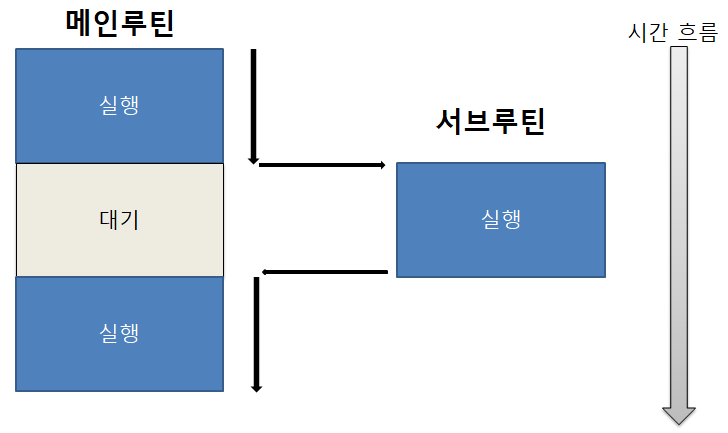    

## 코루틴
- 메인루틴에서 호출되는 또 다른 형태의 서브루틴
    - 진입점과 탈출점이 여러개인 실행흐름이다.
- 서브루틴과 차이점
    - 서브루틴은 실행이 끝나고 메인루틴으로 돌아가면 종료되어 사라지지만,  **코루틴은 일시 정지 상태를 제공하여** 메인루틴과 상호작용이 가능하다. 
    - 서브루틴은 진입점과 반환점이 단 하나밖에 없어 메인루틴에 종속적이지만, 코루틴은 진입지점이 여러개이기 때문에 메인루틴에 종속적이지 않아 대등하게 데이터를 주고 받을 수 있다.

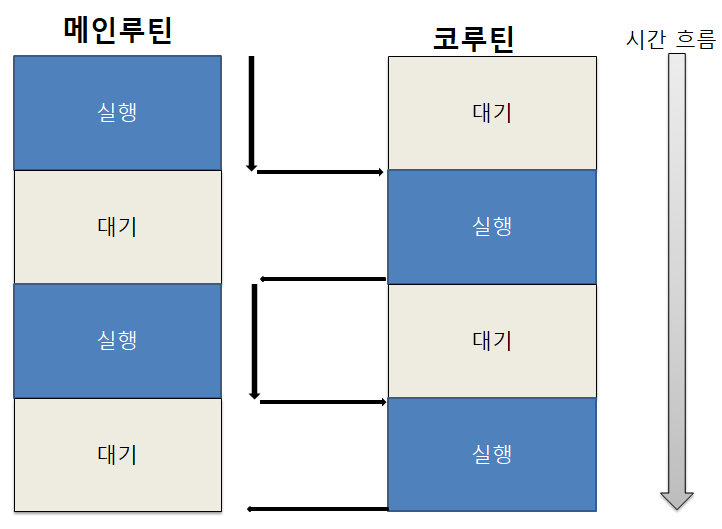

### 코루틴 개념코드
- Generator는 코루틴의 한 종류이다.

###### guide: generator를 이용해 코루틴 개념 코드 작성
- 실제는 async/await 키워드를 이용해 구현하고 호출한다.

In [6]:
# 제너레이터
def generator_exam(i):  # i는 시작 값이 된다.
    print("start test co-routine(generator)")
    while True:
        yield i
        i += 1


a = generator_exam(5)
print(next(a))
print(next(a))
print(next(a))
print(next(a))

start test co-routine(generator)
5
6
7
8


In [5]:
def co_routine_exam(i):
    print("start test2 co-routine")
    while True:
        value = (
            yield i
        )  # yield i 에 멈춤. send(5) 호출시 받은 값을 value에 전달하고 다음 yield를 만날때 까지 아래부분을 실행한다.
        i += value


b = co_routine_exam(10)  # 코루틴 생성. i에 10설정
r1 = next(b)  # `yield i` 가 반환한 값을 받는다.
print(f"r1: {r1}")
r2 = b.send(
    5
)  # 코루틴에 5를 전달해 value = yield가 실행된다. 5는 value에 전달됨. i+value를 i에 넣고 yield i로 반환된다. 그것을 출력
print(f"r2: {r2}")
r3 = b.send(5)
print(f"r3: {r3}")
b.close()  # b.close() #코루틴 종료

start test2 co-routine
r1: 10
r2: 15
r3: 20


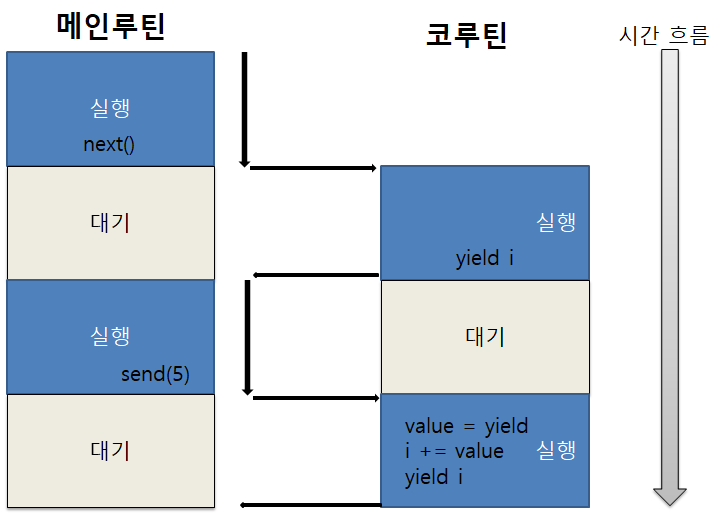

# 이벤트 루프 (Event Loop)를 이용한 동시성 프로그래밍
- 여러개의 작업들을 등록해 놓고 반복문을 돌면서(Loop) 하나씩 실행시킨다. 만약 실행 시킨 작업에 **I/O blocking**과 같이 응답을 기다려야 한다면 이 작업은 통제권을 이벤트 루프에 돌려준다. 통제권을 받은 이벤트 루프는 대기중인 다음 작업을 실행 시킨다. (IO blocking등의 응답 대기 상태때문에 통제권을 이벤트 루프에 돌려주고) 대기했던 작업이 다시 실행되면 멈췄던 부분 다음 부터 실행하게 된다.
- 파이썬에서는 이벤트 루프에 의해 실행되는 Task는 실행과 대기를 반복해야 하므로 서브루틴(함수)이 아닌 **코루틴**으로 구성한다.


> - **동시성(concurrency) 프로그래밍**
>   - 한번에 여러 작업을 동시에 처리한다.

# asyncio
- python 3.3에서 추가
- 함수 정의시 async를 붙이면 코루틴을 만들 수 있다.
    - python 3.4에서 추가
- 구현부에서 병목이 발생해 다른 작업으로 통제권을 넘겨야 할 경우 await을 붙인다.
    - await 뒤에 오는 함수(호출된 함수)도 코루틴으로 작성되어야 한다.
    - 코루틴으로 작성되지 않은 함수를 await를 이용해 호출 해야 하는 경우 `loop.run_in_executor()`를 이용한다.

In [7]:
!pip install nest_asyncio

> ## asyncio와 주피터노트북에서 에러
> - 그냥 실행하면 RuntimeError 발생 
>     - `RuntimeRrror: asyncio.run() cannot be called from a running event loop
> - asyncio는 ipykernel 환경에서 event loop가 지원되지 않는 문제가 있다.
> - nest_asyncio 설치 
>    - `pip install nest_asyncio`
> - 아래코드 실행 (처음 한번만 실행한다.)
> ```python
> import nest_asyncio
> nest_asyncio.apply()
> ```
> - **터미널에서 cli로 실행할 경우는 상관없다.**

In [4]:
!pip install nest_asyncio

In [5]:
import nest_asyncio

nest_asyncio.apply()

In [2]:
import time

In [20]:
def sleep(sec):
    time.sleep(sec)


def main():
    sleep(1)
    sleep(2)
    sleep(3)


if __name__ == "__main__":
    start = time.perf_counter()
    main()
    end = time.perf_counter()
    print("걸린시간:", (end - start))

걸린시간: 6.026502847671509


In [6]:
import asyncio


async def sleep2(sec):
    await asyncio.sleep(sec)
    return sec


async def main():

    result = await asyncio.gather(
        sleep2(1), sleep2(2), sleep2(3)
    )  # event loop에 등록하여 실행한다.
    print(result)  # 각 task의 result를 묶어서 반환환다.


if __name__ == "__main__":
    start = time.perf_counter()
    asyncio.run(main())
    #     await main()  ##################GUIDE: 주피터 노트북에서는 이미 event loop를 실행하고 있기 때문에 이렇게 실행해야 한다고 한다. 그런데 cli와 통일성을 위해 nest_asyncio 패키지를 이용하자.
    end = time.perf_counter()
    print("걸린시간:", (end - start))

[1, 2, 3]
걸린시간: 3.0218006999930367


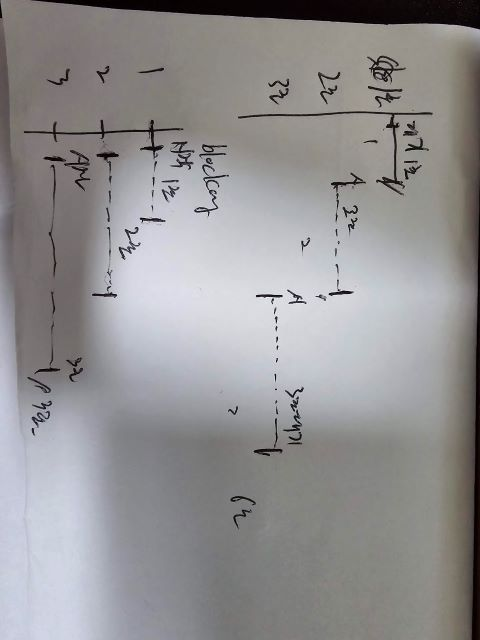

# --------------수업엔 하지 않는다. -------------------------
## 코루틴이 아닌 함수 비동기적으로 이용
- await 뒤에 오는 함수는 코루틴으로 작성되어야 비동기적으로 작업할 수 있다. 파이썬의 함수들은 대부분 코루틴으로 작성되지 않았는데 이런 함수들은 바로 호출 할 수 없다.
- 해결책: 이벤트 루프의 run_in_execute() 함수 사용
    - 첫 인자로 concurrent.futures.Executor 객체를 넣는데 보통 None으로 지정(asyncio의 내장 executor가 기본으로 실행됨), **두번째 인자로 사용하려는 함수 객체**를 **세번째 인자 부터는 호출하는 함수에 전달할 인자를 위치인자로 넣는다.**  (keyword 인자 안됨)
    - 내부적으로 쓰레드로 실행된다.

## Guide
- 파이썬의 쓰레드는 GIL 때문에 context switch 비용이 크다. 그래서 사용할 수있으면 코루틴을 사용하는 것이 좋다.

In [13]:
import asyncio, time


async def coroutine_3():
    print("코루틴 3 시작")
    print("코루틴 3 중단. 3초간 대기")
    loop = asyncio.get_event_loop()
    await loop.run_in_executor(None, time.sleep, 3)
    print("코루틴 3 재개")


async def coroutine_4():
    print("코루틴 4 시작")
    print("코루틴 4 중단. 3초간 대기")
    loop = asyncio.get_event_loop()
    await loop.run_in_executor(None, time.sleep, 3)
    #     await time.sleep(5) #예외발생. 5초후 await 실행시 에러 발생 coroutine 함수가 아니므로
    print("코루틴 4 재개")


if __name__ == "__main__":

    start = time.perf_counter()
    asyncio.run(asyncio.gather(coroutine_3(), coroutine_4()))
    end = time.perf_counter()
    print(f"걸린시간:{end-start}")

코루틴 3 시작
코루틴 3 중단. 3초간 대기
코루틴 4 시작
코루틴 4 중단. 3초간 대기
코루틴 4 재개
코루틴 3 재개
걸린시간:3.004200400000002


--------------수업엔 하지 않는다. 여기까지-------------------------

# aiohttp 패키지
- https://docs.aiohttp.org/en/stable/
- asyncio를 위한 비동기 서버/클라이언트 처리를 위한 파이썬 라이브러리.
- 설치
    - `pip install aiohttp`

In [ ]:
## with 절 안쓰는 session
# session = aiohttp.ClientSession()
# async with session.get('...'):
#     # ...
# await session.close()

In [ ]:
# aioHttp 기본코드
import aiohttp
import asyncio


# url로 요청 -> 결과 받기
async def main():
    # 코루틴을 with절에서 사용할 경우 async with를 사용
    ua = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
    async with aiohttp.ClientSession(headers={"User-Agent": ua}) as sess:
        async with sess.get("https://python.org") as response:
            print("status code:", response.status)
            print("응답 header 정보:", type(response.headers))
            html = await response.text()
            print("html:", html)


if __name__ == "__main__":
    asyncio.run(main())

status code: 200
응답 header 정보: <class 'multidict._multidict.CIMultiDictProxy'>
html: <!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="en">

<head prefix="og: http://ogp.me/ns#">
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta name="description" content="Definition of HELLO (interjection): when meeting someone or starting telephone call; saying someone is being silly or not listening; used for ..." />
    <meta name="keywords" content="american english, HELLO (interjection) definition, meaning, define, pronunciation" />
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta id="viewport" name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=no" />

    <title>HELLO (interjection) American English definition and synonyms | Macmillan Dictionary</title>

<link href="https://fonts.googleapis.com/css?family=Martel:400,700&display=swap" rel="stylesheet" type="text/css" media="print" onload="this.

# 크롤링 적용

## 동기적 방식
- 단어 조회

In [1]:
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"
}

# 개발자 도구 console에서 자바스크립트 코드로 조회
#   navigator.userAgent

In [5]:
# search_words_sync.py
import requests
import time
from bs4 import BeautifulSoup


def get_text_from_url(url):
    print(f"Send request to ... {url}")
    res = requests.get(url, headers=headers)
    print(f"Get response from ... {url}", res.status_code)
    text = BeautifulSoup(res.text, "html.parser").text
    return text


if __name__ == "__main__":
    start = time.time()

    base_url = "https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/{keyword}"
    keywords = [
        "hi",
        "apple",
        "banana",
        "call",
        "feel",
        "hello",
        "bye",
        "like",
        "love",
        "environmental",
        "buzz",
        "ambition",
        "determine",
    ]
    # 단어 별로 조회 URL 만들기
    urls = [base_url.format(keyword=keyword) for keyword in keywords]
    for url in urls:
        print(url)
        text = get_text_from_url(url)
        print(">>>", text[:100].strip())
    end = time.time()
    print(f"time taken: {end-start}")

https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/hi
Send request to ... https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/hi
Get response from ... https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/hi 200
>>> HI | 영어를 한국어로 번역: Cambridge Dictionary
https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/apple
Send request to ... https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/apple
Get response from ... https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/apple 200
>>> APPLE | 영어를 한국어로 번역: Cambridge Dictionary
https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/banana
Send request to ... https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0

## 비동기적 방식

요청에 대한 응답을 기다리지 않고 바로 다른 요청을 하는 것을 확인할 수 있습니다. 또한, "hi > apple > banana" 순으로 요청했으나 응답은 "ambition > apple > love" 순으로 요청순서와 일치하지 않는 것을 확인할 수 있습니다. 이는 요청순서가 아니라 응답 순서로 코드를 처리했기 때문입니다.

In [4]:
# --------------------guide코드 이건 수업에 안한다. ====> requests를 이용한 코드---------------

import requests
import time
import asyncio
from functools import partial
from bs4 import BeautifulSoup


async def get_text_from_url(url):  # 코루틴 정의
    print(f"Send request to ... {url}")
    loop = asyncio.get_event_loop()

    # loop.run_in_executor는 kwargs(keyword arguments)를 사용할 수 없기 때문에 functools.partial을 활용
    request = partial(requests.get, url, headers=headers)
    # ascyncio의 디폴트 쓰레드풀을 사용할 경우 첫번째 인자로 None
    # 직접 쓰레드풀을 만들 경우 concurrent.futures.threadpoolexecutor 사용
    res = await loop.run_in_executor(None, request)
    print(f"Get response from ... {url}")
    text = BeautifulSoup(res.text, "html.parser").text
    print(text[:100].strip())


async def main():
    base_url = "https://dictionary.cambridge.org/ko/%EC%82%AC%EC%A0%84/%EC%98%81%EC%96%B4-%ED%95%9C%EA%B5%AD%EC%96%B4/{keyword}"
    keywords = [
        "hi",
        "apple",
        "banana",
        "call",
        "feel",
        "hello",
        "bye",
        "like",
        "love",
        "environmental",
        "buzz",
        "ambition",
        "determine",
        "tiger",
        "cat",
        "routine",
        "main",
        "function",
        "go",
        "get",
        "take",
        "run",
        "fruite",
        "zoo",
        "camel",
    ]

    # 아직 실행된 것이 아니라, 실행할 것을 계획하는 단계
    #     futures = [asyncio.ensure_future(get_text_from_url(
    #         base_url.format(keyword=keyword))) for keyword in keywords]
    tasks = [
        get_text_from_url(base_url.format(keyword=keyword)) for keyword in keywords
    ]
    await asyncio.gather(*tasks)


if __name__ == "__main__":

    start = time.perf_counter()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())
    end = time.perf_counter()
    print(f"time taken: {end-start}")

RuntimeError: This event loop is already running

##  비동기적 방식 (asyncio + aiohttp)
-  requests모듈은 코루틴으로 만들어진 모듈이 아니기 때문에 위의 코드는 내부적으로 쓰레드를 만들어 동작합니다. 따라서, 요청의 수가 많아질수록 컨텍스트 스위칭의 비용이 발생합니다.
- 비동기 HTTP통신 라이브러리인 aiohttp를 이용하면 코루틴을 이용한 비동기 방식을 이용할 수 있습니다

In [7]:
!pip install aiohttp

G: async with : https://soooprmx.com/archives/8629

# 주의

- user agenet 헤더에 넣어야 한다.
- ssl 오류 나는 경우 있다.
    - ClientSession(connector=aiohttp.TCPConnector(ssl=False)) 지정한다.

In [16]:
# english_word_search_async.py
########################
# import
##########################
import asyncio
import aiohttp
import time


async def get_word(url, session):
    async with session.get(url) as response:
        if response.status == 200:
            return await response.text()


async def main(url_list):
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
    headers = {"User-Agent": user_agent}
    async with aiohttp.ClientSession(headers=headers) as session:
        result_list = await asyncio.gather(
            *[get_word(url, session) for url in url_list]
        )
        return result_list


if __name__ == "__main__":

    base_url = "https://www.macmillandictionary.com/us/dictionary/american/{keyword}"
    keywords = [
        "hi",
        "apple",
        "banana",
        "call",
        "feel",
        "hello",
        "bye",
        "like",
        "love",
        "environmental",
        "buzz",
        "ambition",
        "determine",
    ]
    url_list = [base_url.format(keyword=word) for word in keywords]
    print(url_list)
    start = time.time()
    result = asyncio.run(main(url_list))
    end = time.time()
    print(len(result))
    print("걸린시간:", end - start, "초")

ServerDisconnectedError: Server disconnected

ServerDisconnectedError: Server disconnected

### 다음 뉴스
1. 링크 조회
2. 각 링크들의 상세 페이지에서 뉴스 기사 가져오기

In [45]:
# aiohttp_exam 폴더 확인

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

url = "https://media.daum.net/"
res = requests.get(url)
if res.status_code == 200:
    soup = BeautifulSoup(res.text)
    li_list = soup.select(".list_newsissue > li")
    # li 들을 목록으로 조회한 뒤 반복문 돌리면서 link 와 내용가져오기
    # 내용
    title_list = []
    # 링크
    link_list = []

    # 순위 빼는 것 아래 GUIDE 확인
    for li in li_list:
        #     print(li)
        a_tag = li.select_one(".cont_thumb > strong > a")
        link_list.append(a_tag.get("href"))
        txt = a_tag.get_text().strip()
        title_list.append(txt)

    df = pd.DataFrame({"title": title_list, "link": link_list})


#     <a href="https://v.daum.net/v/20230321110808500" class="link_txt" data-tiara-layer="article_main" data-tiara-id="20230321110808500" data-tiara-type="harmony" data-tiara-ordnum="8" data-tiara-custom="contentUniqueKey=hamny-20230321110808500&amp;clusterId=5590543,5000019,5201407,5201410,5657533,5150094,5774875,5656341,5139529&amp;clusterTitle=[언론사픽] 주요뉴스,경제,카테고리별,경제일반,신종자본증권,경제,뱅크런,채권시장,[랭크업] 유레이더 1 OR 2 추가점수&amp;keywordType=NONE,NONE,NONE,NONE,INTEREST,NONE,INTEREST,INTEREST,NONE">
#                                     코코본드가 뭐길래...뱅크런 대신 본드런 오나
#                                 </a>

In [46]:
df

,title,link
0,"""그놈의 테슬라 때문에…"" 中 '마이너스섬 게임'에 독일차 고통",https://v.daum.net/v/20230321110837526
1,"탱크·전투기도 목마르지만…""우크라군, 장갑차가 더 절실""",https://v.daum.net/v/20230321112617612
2,"[단독] 與, 예금자 보호 한도 확대 추진…5000만→1억 이상",https://v.daum.net/v/20230321112011199
3,"""일감 쌓였다, 인력 급구""…K-방산, 이러다 고용시장 '큰 손'",https://v.daum.net/v/20230321061005971
4,"소래포구 해양쓰레기 수거·처리량, 올해 두 배 늘린다",https://v.daum.net/v/20230321112317407
5,"“우산만은, 시계만은…” 30톤 쓰레기집",https://v.daum.net/v/20230321070032494
6,尹대통령 “자신있게 일본 대해야…日 분명 호응할 것”,https://v.daum.net/v/20230321104942425
7,“한동안 뜸했었지”…집값반등 기대에 서울아파트 사들이는 외지인들,https://v.daum.net/v/20230321111500818
8,"""유명 맛집도 아닌데 줄이…"" 홍콩 찾은 전세계 부자들",https://v.daum.net/v/20230321111611934
9,"교육위, ‘정순신 아들 학폭 청문회’ 野 단독 의결…정순신 증인 채택",https://v.daum.net/v/20230321102844528


In [60]:
import asyncio
import aiohttp


async def get_news_data(url, session):

    async with session.get(url) as res:  # 요청 및 응답 with 문 빠져 나오면 연결 끊는다.
        txt = await res.text()  # IO 작업이므로
        soup = BeautifulSoup(txt, "lxml")
        p_list = soup.select(
            ".news_view .article_view p"
        )  #  p 태그에 문단별로 들어가 있다. text만 가져올 것이므로 p선택
        news = []
        for p in p_list:
            news.append(p.get_text())
        news = " ".join(news)
    return news

In [67]:
async def run():
    # 아직 실행된 것이 아니라, 실행할 것을 계획하는 단계
    async with aiohttp.ClientSession() as session:
        tasks = [get_news_data(url, session) for url in df.link]
        results = await asyncio.gather(*tasks)
    return results

In [68]:
import nest_asyncio

nest_asyncio.apply()

In [69]:
results = asyncio.run(run())
print(len(results))

20
